In [109]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.segmentation import clear_border
from skimage import measure
from skimage.measure import label,regionprops
from skimage import (io, filters,  morphology, measure, segmentation, feature, util, exposure)
from scipy.ndimage import gaussian_filter 
from scipy import ndimage as ndi
from scipy.ndimage import measurements, center_of_mass, binary_dilation, zoom
import plotly.graph_objects as go

plt.rcParams['figure.figsize'] = [12,10]


(1024, 1024)
(1024, 1024)


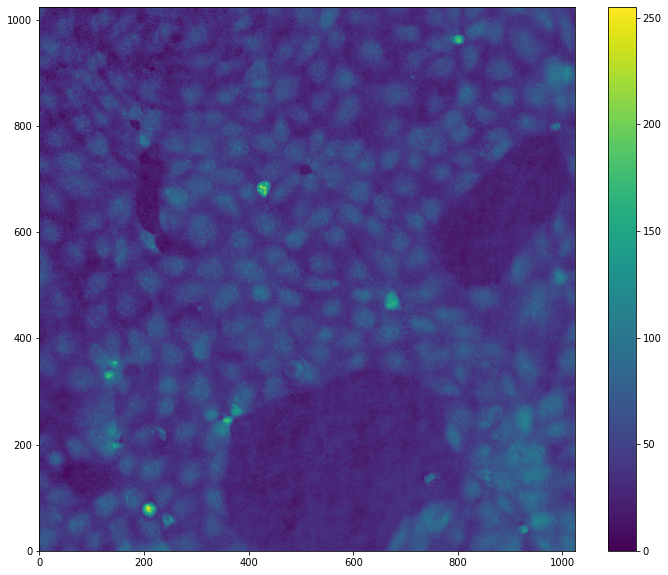

In [110]:
from skimage.io import imread

image = imread('C:/Users/Nigar/Documents/UiOM2/MachineLearning/cellpose_AML/test/Well1Pos4-PlainImages_test/a.tiff')
print(image.shape)

img = np.flip(image, axis=0) #image appeared flipped when reading through imread so I flipped it 90 degrees
print(img.shape)
# plt.figure(figsize=(8,8))
plt.pcolormesh(img)
plt.colorbar()

Now, make a mask. If you can...

(1024, 1024)


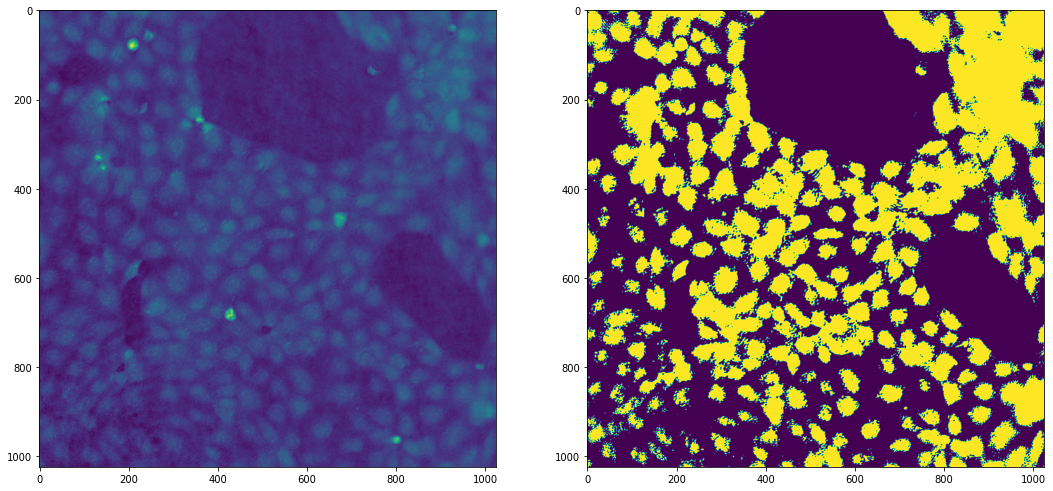

In [113]:
mask = img > 45

fig, ax = plt.subplots(1, 2, figsize=(18, 18))
ax[0].imshow(img)
ax[1].imshow(mask)

print(img.shape)
# plt.colorbar()

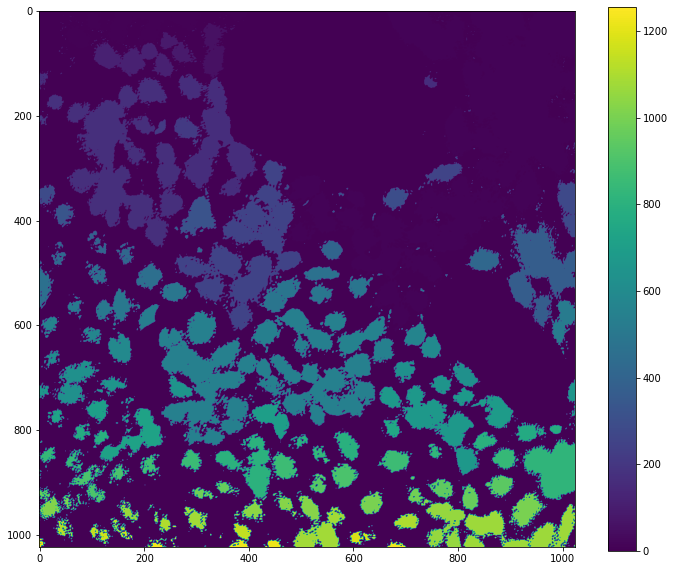

In [115]:
mask_labeled = np.vectorize(label, signature='(n,m)->(n,m2)')(mask)
plt.imshow(mask_labeled)
plt.colorbar()

# mask_blurred = gaussian_filter(mask, sigma = 0.25)
# plt.imshow(mask_blurred)


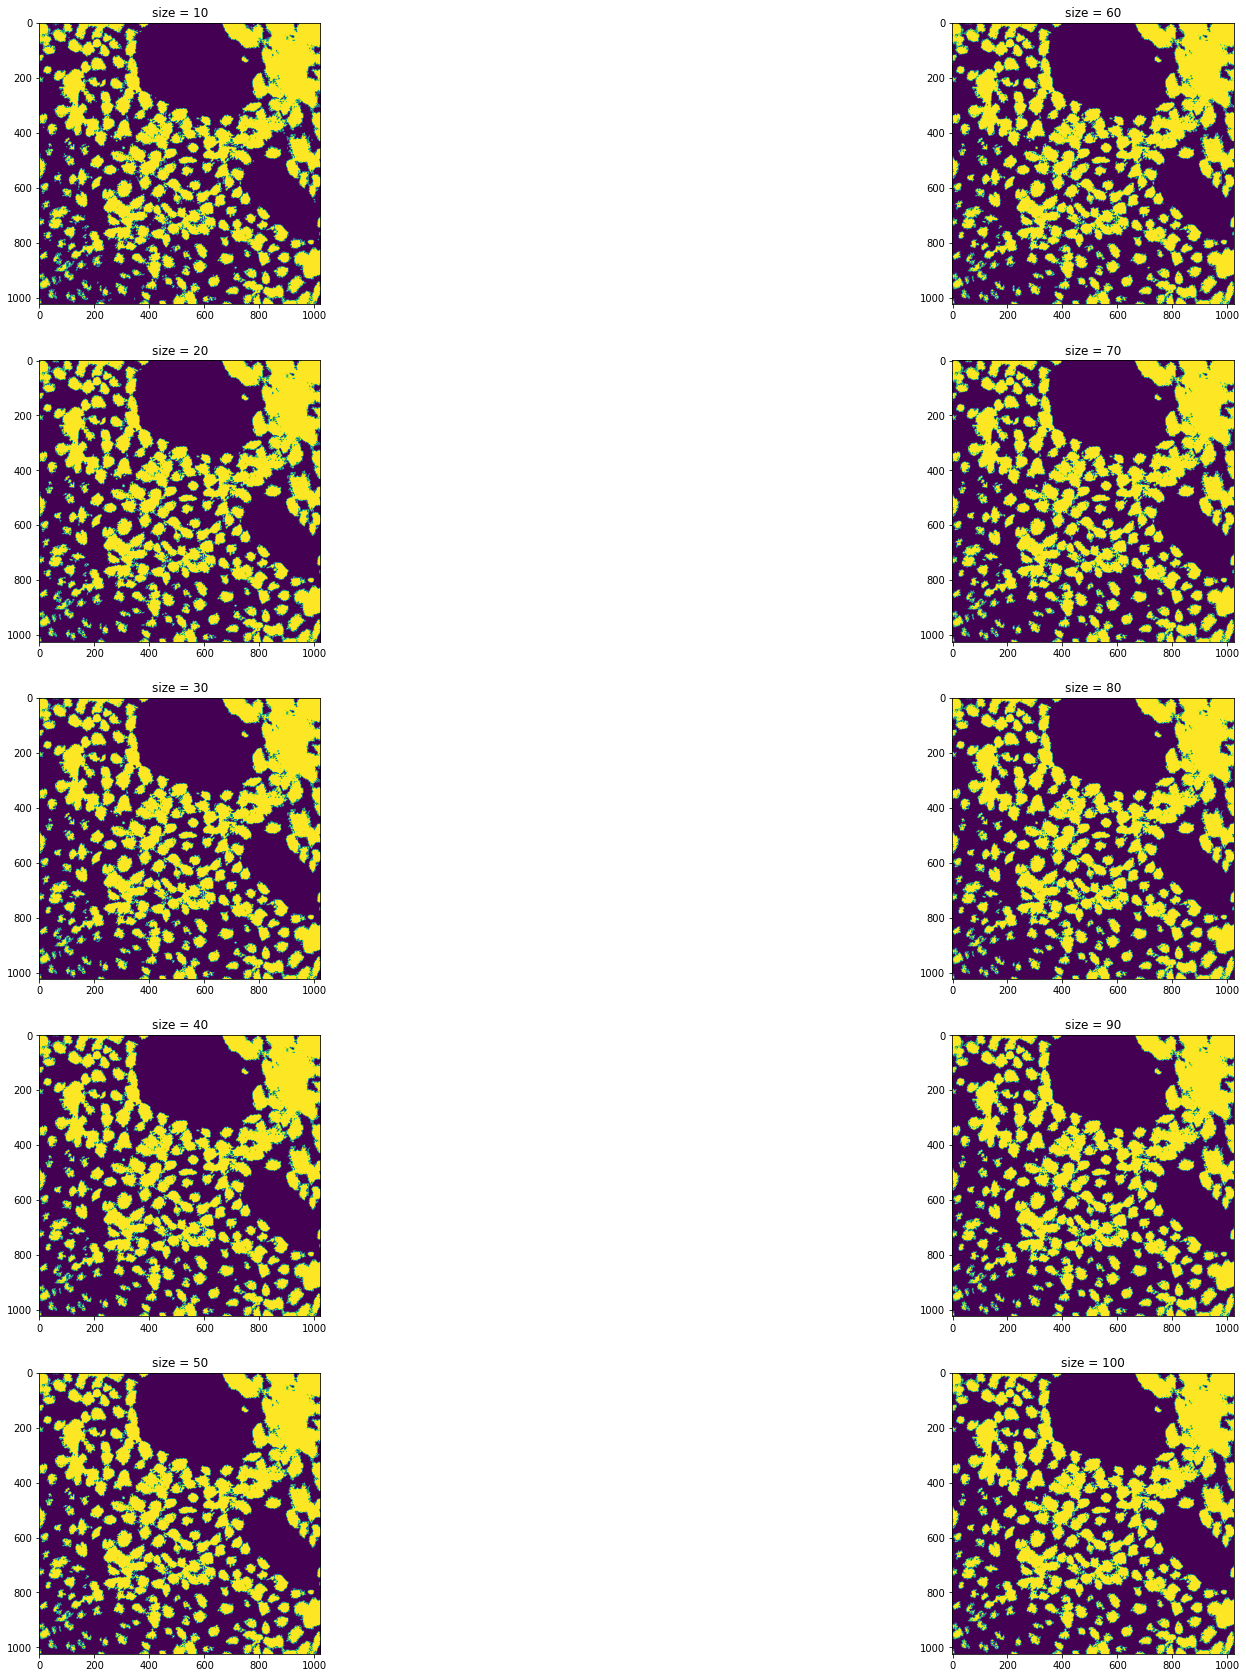

In [127]:
remove_small_50 = morphology.remove_small_objects(mask, 50)
#make a loop for removing small objects with a certain size
size = [10,20,30,40,50,60,70,80,90,100]
#plot as subplots
#check if this is actually doing what its supposed to be doing because it feels fishy
fig, ax = plt.subplots(5, 2, figsize=(30, 30))
for i in range(2):
    for j in range(5):
        ax[j,i].imshow(morphology.remove_small_objects(mask, size[i*2+j]))
        ax[j,i].set_title('size = ' + str(size[i*5+j]))

Let us settle on min_size = 60 for now. Next step is to perform some closing operations to hopefully recover our cells' shapes.

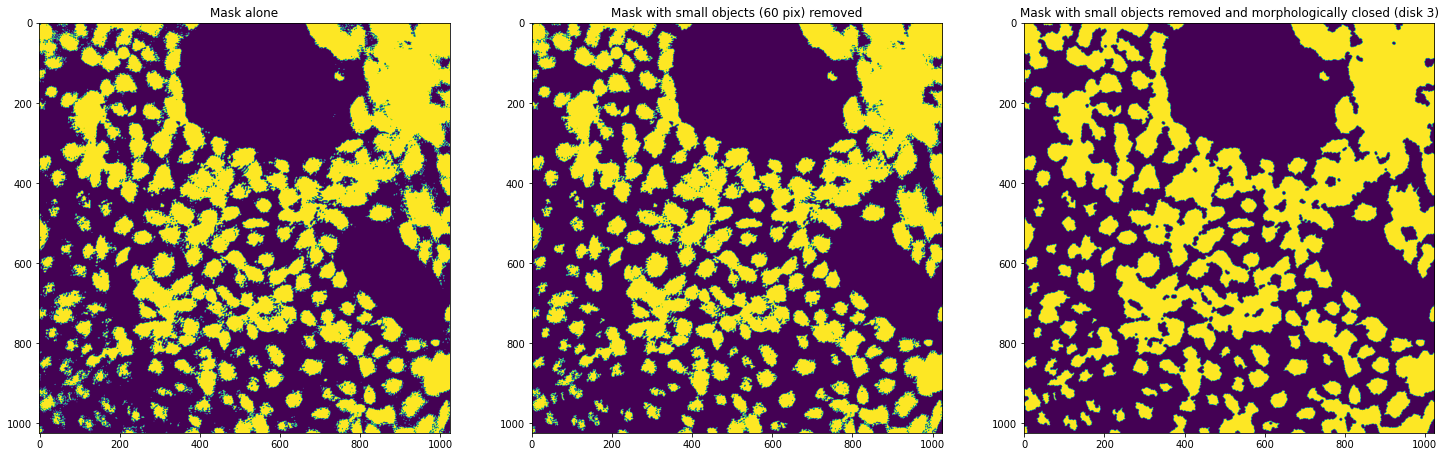

In [142]:
mask_removed = morphology.remove_small_objects(remove_small_50, 60)

mask_closed = morphology.closing(mask_removed, morphology.disk(3))

fig, ax = plt.subplots(1, 3, figsize=(25, 25))
ax[0].imshow(mask)
ax[0].set_title('Mask alone')
ax[1].imshow(mask_removed)
ax[1].set_title('Mask with small objects (60 pix) removed')
ax[2].imshow(mask_closed)
ax[2].set_title('Mask with small objects removed and morphologically closed (disk 3)')
plt.show()  